In [62]:
# !pip install textblob

In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [64]:
pd.set_option('display.max_colwidth', None) #prevent truncated view of dataframe
pd.set_option('display.max_rows', None) #show all rows

In [78]:
pd.options.display.max_rows = None

In [65]:
df = pd.read_csv("clean_all_job_data.csv")

In [66]:
df = df.drop(df.columns[0:2], axis=1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   keyword                            2555 non-null   object 
 1   link                               2555 non-null   object 
 2   job_id                             2555 non-null   int64  
 3   job_title                          2555 non-null   object 
 4   job_expired                        2555 non-null   bool   
 5   job_confidential                   2555 non-null   bool   
 6   job_salary_min                     578 non-null    float64
 7   job_salary_max                     578 non-null    float64
 8   job_salary_currency                2423 non-null   object 
 9   company                            2539 non-null   object 
 10  job_post_date                      2555 non-null   object 
 11  job_internship                     2555 non-null   bool 

In [68]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [90]:
vectorizer = TfidfVectorizer(ngram_range=(1,3)) #unigram to trigram
#Tokenize and build vocabulary
X = vectorizer.fit_transform(df.clean_job_desc)
y = df.keyword

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) 
print("train data shape: ",X_train.shape)
print("test data shape: ",X_test.shape)

train data shape:  (2044, 455591)
test data shape:  (511, 455591)


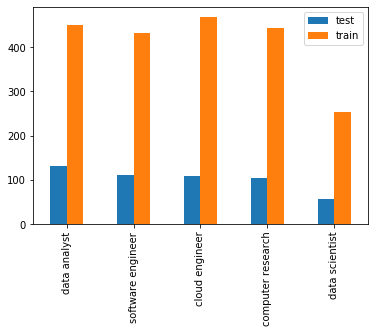

In [92]:
bar_df = pd.merge(y_test.value_counts(),y_train.value_counts(),left_index=True, right_index=True)
bar_df = bar_df.rename(columns={"keyword_x": "test", "keyword_y": "train"})

bar_df.plot.bar()

In [93]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

In [94]:
print("Accuracy score is: ",accuracy_score(y_test, y_predicted))
print("Classes: (to help read Confusion Matrix)\n", clf.classes_)
print("Confusion Matrix: ")

print(confusion_matrix(y_test, y_predicted))
print("Classification Report: ")
print(classification_report(y_test, y_predicted))

Accuracy score is:  0.821917808219178
Classes: (to help read Confusion Matrix)
 ['cloud engineer' 'computer research' 'data analyst' 'data scientist'
 'software engineer']
Confusion Matrix: 
[[106   0   1   0   2]
 [  0  96   3   0   6]
 [  9   0 117   0   5]
 [  3  17  19  15   2]
 [ 19   1   4   0  86]]
Classification Report: 
                   precision    recall  f1-score   support

   cloud engineer       0.77      0.97      0.86       109
computer research       0.84      0.91      0.88       105
     data analyst       0.81      0.89      0.85       131
   data scientist       1.00      0.27      0.42        56
software engineer       0.85      0.78      0.82       110

         accuracy                           0.82       511
        macro avg       0.86      0.77      0.77       511
     weighted avg       0.84      0.82      0.80       511



In [95]:
print(clf.coef_)
print(clf.coef_.shape)

[[-13.05368284 -13.05368284 -13.05368284 ... -13.05368284 -13.05368284
  -13.05368284]
 [-13.04561327 -13.04561327 -13.04561327 ... -13.04561327 -13.04561327
  -13.04561327]
 [-13.05020236 -13.05020236 -13.05020236 ... -13.05020236 -13.05020236
  -13.05020236]
 [-13.04076826 -13.04076826 -13.04076826 ... -13.04076826 -13.04076826
  -13.04076826]
 [-12.97899803 -12.97899803 -12.97899803 ... -12.95563253 -12.95563253
  -12.95563253]]
(5, 455591)


C:\Users\teo-e\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [99]:
from textblob import TextBlob
technical_skills = ['python', 'c','r', 'c++','java','hadoop','scala','flask','pandas','spark','scikit-learn',
                    'numpy','php','sql','mysql','css','mongdb','nltk','fastai' , 'keras', 'pytorch','tensorflow',
                   'linux','ruby','javascript','django','react','reactjs','ai','ui','tableau']
feature_array = vectorizer.get_feature_names()
# number of overall model features
features_numbers = len(feature_array)
## max sorted features number
n_max = int(features_numbers * 0.1)

##initialize output dataframe
output = pd.DataFrame()
for i in range(0,len(clf.classes_)):
    print("\n****" ,clf.classes_[i],"****\n")
    class_prob_indices_sorted = clf.feature_log_prob_[i, :].argsort()[::-1]
    raw_skills = np.take(feature_array, class_prob_indices_sorted[:n_max])
    print("list of unprocessed skills :")
    [print(x, end=", ") for x in raw_skills[:20]] 
    print()
    print("#"*20)
    
    ## Extract technical skills
    top_technical_skills= list(set(technical_skills).intersection(raw_skills))
    #print("Top technical skills",top_technical_skills)
    print("list of programming language")
    [print(x, end=", ") for x in top_technical_skills[:20]]
    print()
    print("#"*20)
    
    ## Extract adjectives
    
    # Delete technical skills from raw skills list
    ## At this steps, raw skills list doesnt contain the technical skills
    #raw_skills = [x for x in raw_skills if x not in top_technical_skills]
    #raw_skills = list(set(raw_skills) - set(top_technical_skills))

    # transform list to string
    txt = " ".join(raw_skills)
    blob = TextBlob(txt)
    #top 6 adjective
    top_adjectives = [w for (w, pos) in TextBlob(txt).pos_tags if pos.startswith("JJ")]
    print("Top adjectives: ")
    [print(x, end=", ") for x in top_adjectives[:20]]
    print()
    print("#"*20)
    print()
    
    output = output.append({'job_title':clf.classes_[i],
                        'raw_skills' : raw_skills,
                        'technical_skills':top_technical_skills,
                        'soft_skills':top_adjectives },
                       ignore_index=True)


**** cloud engineer ****

list of unprocessed skills :
cloud, infrastructure, security, service, technology, system, solution, aws, team, devops, operation, amp, application, management, business, support, environment, azure, tool, technical, 
####################
list of programming language
python, linux, react, mysql, tableau, django, spark, hadoop, javascript, scala, sql, java, ruby, numpy, ai, php, 
####################
Top adjectives: 
cloud, team, technical, linux, process, incident, operational, microsoft, best, understanding, continuous, responsible, ansible, architect, advantage, professional, least, cloud, lead, implement, 
**** computer research ****

list of unprocessed skills :
research, computer, learning, engineering, science, computer science, machine, machine learning, ai, position, invite application, application position, invite, invite application position, project, candidate, science engineering, system, data, application, 
####################
list of programmin

In [158]:
TextBlob("description position suitable individual constant learner problem solver multi taskers candidate thrive fast paced environment step face challenge able deliver result welcome apply looking candidate interested implementation operation cloud infrastructure responsible implementing maintaining cloud infrastructure aws azure google cloud xtremax customer provide support customer issue cloud infrastructure closely security monitor privacy develop incident response procedure least year hand managing network infrastructure managed service aws azure gcp least one cloud certification level higher e g aws certified sysops administrator associate microsoft certified azure administrator associate google cloud certified professional data engineer least one operating system linux window understanding networking preferable tcp ip ip address http dns basic security concept user management o hardening communication scripting skill powershell bash python nodejs etc extra value submitting resume cv consent agree allow information provided used processed behalf xtremax pte ltd purpose registration interest current future employment u processing application employment personal data held u relating application kept strictly confidential accordance pdpa may also refer privacy policy detail http www xtremax com privacy policy inform consent providing necessary data required u process application potentially able offer").pos_tags

[('description', 'NN'),
 ('position', 'NN'),
 ('suitable', 'JJ'),
 ('individual', 'JJ'),
 ('constant', 'JJ'),
 ('learner', 'NN'),
 ('problem', 'NN'),
 ('solver', 'NN'),
 ('multi', 'NN'),
 ('taskers', 'NNS'),
 ('candidate', 'VBP'),
 ('thrive', 'JJ'),
 ('fast', 'NN'),
 ('paced', 'VBD'),
 ('environment', 'NN'),
 ('step', 'NN'),
 ('face', 'NN'),
 ('challenge', 'VBP'),
 ('able', 'JJ'),
 ('deliver', 'NN'),
 ('result', 'NN'),
 ('welcome', 'VBP'),
 ('apply', 'NN'),
 ('looking', 'VBG'),
 ('candidate', 'NN'),
 ('interested', 'JJ'),
 ('implementation', 'NN'),
 ('operation', 'NN'),
 ('cloud', 'JJ'),
 ('infrastructure', 'NN'),
 ('responsible', 'JJ'),
 ('implementing', 'VBG'),
 ('maintaining', 'JJ'),
 ('cloud', 'JJ'),
 ('infrastructure', 'NN'),
 ('aws', 'VBZ'),
 ('azure', 'JJ'),
 ('google', 'NN'),
 ('cloud', 'NN'),
 ('xtremax', 'NNP'),
 ('customer', 'NN'),
 ('provide', 'NN'),
 ('support', 'NN'),
 ('customer', 'NN'),
 ('issue', 'NN'),
 ('cloud', 'NN'),
 ('infrastructure', 'NN'),
 ('closely', 'RB'),
 

In [97]:
print(output.T)

In [98]:
output

,job_title,raw_skills,technical_skills,soft_skills
0,cloud engineer,"[cloud, infrastructure, security, service, technology, system, solution, aws, team, devops, operation, amp, application, management, business, support, environment, azure, tool, technical, platform, network, development, architecture, automation, deployment, salesforce, monitoring, customer, engineer, server, manage, design, ci, linux, year, software, delivery, cloud infrastructure, working, cd, configuration, ci cd, data, etc, process, pipeline, code, hand, project, kubernetes, incident, bank, operational, integration, group, ability, certification, enterprise, provide, networking, engineering, using, microsoft, best, understanding, level, including, practice, implementation, container, scripting, administration, build, docker, com, continuous, role, problem, apply, responsible, performance, issue, ansible, maintain, architect, product, develop, ensure, advantage, government, ea, window, control, information, professional, compliance, like, cloud platform, troubleshooting, ...]","[python, linux, react, mysql, tableau, django, spark, hadoop, javascript, scala, sql, java, ruby, numpy, ai, php]","[cloud, team, technical, linux, process, incident, operational, microsoft, best, understanding, continuous, responsible, ansible, architect, advantage, professional, least, cloud, lead, implement, perform, preferred, various, sre, degree, able, cloud, multiple, agile, high, familiar, least, hybrid, cloud, ci, cloud, dynamic, salary, sg, java, internal, personal, cloud, global, vmware, center, native, end, strategic, upgrade, equivalent, competitive, continuous, operational, resilient, cloud, native, pte, ltd, microsoft, personal, relevant, automated, large, degree, inspire, minimum, dynamic, complex, degree, ibm, critical, amp, active, efficient, nimble, resilient, strategic, strategic, nimble, resilient, efficient, nimble, nimble, resilient, resilient, strategic, strategic, efficient, nimble, operational, nimble, concept, multiple, google, multiple, operational, multiple, strategic, operational, ...]"
1,computer research,"[research, computer, learning, engineering, science, computer science, machine, machine learning, ai, position, invite application, application position, invite, invite application position, project, candidate, science engineering, system, data, application, electrical, position research, application position research, development, deep learning, algorithm, publication, computer science engineering, vision, school, computer vision, phd, deep, software, research associate, programming, computer engineering, nu, communication, security, associate, record, field, design, research engineer, master, develop, conduct, school computer science, school computer, singapore, iot, paper, engineering computer, area, team, background, relevant, processing, institute, based, engineering scse, scse, science engineering scse, conference, analysis, student, electrical engineering, degree, study, conduct research, engineering computer science, bachelor, electronic, electronics, technology, report, scse invite application, engineering scse invite, scse invite, analytics, journal, engineer, python, centre, phd computer, degree computer, research development, excellent, lab, method, top, electronic engineering, may, model, discipline, graph, time, university, intelligence, ...]","[python, linux, ui, django, react, tableau, tensorflow, spark, javascript, sql, java, ruby, numpy, ai, reactjs, pytorch, php]","[ai, invite, invite, invite, electrical, algorithm, deep, nu, iot, relevant, scse, electrical, electronic, invite, invite, invite, journal, top, electronic, graph, assistant, tier, applicant, electrical, joint, electrical, etc, associate, able, clinical, joint, covid, minimum, scientific, senior, artificial, artificial, english, relevant, electrical, electronic, human, undertake, real, tensorflow, electrical, electronic, malware, senior, relevant, equivalent, senior, suc

In [101]:
output[output['job_title']=='software engineer']

,job_title,raw_skills,technical_skills,soft_skills
4,software engineer,"[software, development, design, test, application, system, web, team, testing, net, amp, product, code, technology, programming, project, software development, java, develop, user, technical, framework, computer, engineer, data, quality, engineering, solution, using, end, working, ea, year, service, degree, sql, familiar, support, specification, personal, developer, diploma, apply, least, customer, business, ensure, software engineer, information, able, resume, language, database, documentation, please, understanding, control, science, computer science, full, agile, environment, architecture, spring, com, personal data, problem, based, javascript, embedded, process, mobile, web application, degree computer, issue, high, communication, ability, cs, server, html, automation, developing, client, advantage, integration, persolkelly, implementation, tool, degree computer science, singapore, required, maintain, participate, candidate, api, performance, platform, provide, responsible, ...]","[ui, spark, java, mongdb, linux, react, javascript, ruby, tableau, scala, python, django, mysql, hadoop, sql, php, ai, reactjs, flask]","[web, net, amp, user, technical, ea, familiar, personal, least, able, understanding, full, personal, high, html, implementation, maintain, participate, responsible, functional, equivalent, requirement, proficient, build, assist, cs, asp, net, perform, least, interested, relevant, angular, ui, front, implement, pattern, basic, best, salary, linux, posse, apis, professional, purpose, minimum, know, global, continuous, applicant, excellent, senior, visual, degree, com, enhancement, restful, high, complex, minimum, learn, driven, singapore, wish, mobile, pte, ltd, personal, consent, dynamic, clean, available, degree, end, relevant, advantageous, full, electrical, various, internal, analyse, scalable, different, resume, analytical, prospective, interpersonal, embedded, personal, personal, digital, prospective, understand, solid, ci, click, multiple, relational, english, node, ...]"


In [103]:
skills_df = df[['keyword','clean_job_desc']]

In [154]:
def match_skills(dataframe):
    tokens = set(dataframe.clean_job_desc.split(" "))
    technical_skills = output[output.job_title==dataframe.keyword]['technical_skills'].tolist()[0]
    dataframe['technical_skills'] = list(set(technical_skills).intersection(tokens))
    
    soft_skills = output[output.job_title==dataframe.keyword]['soft_skills'].tolist()[0]
    dataframe['soft_skills'] = list(set(soft_skills).intersection(tokens))
    
    raw_skills = output[output.job_title==dataframe.keyword]['raw_skills'].tolist()[0]
    dataframe['raw_skills'] = list(set(raw_skills).intersection(tokens) - set(technical_skills) - set(soft_skills))
    
    return dataframe

In [ ]:
skills_df = skills_df.apply(match_skills, axis=1)

In [ ]:
skills_df